In [1]:
import numpy as np
import pandas as pd
import logging
import anndata as ad
import matplotlib.pyplot as plt
import plotly.express as px

import magic
import umap

import scanpy as sc
logging.basicConfig(level=logging.INFO)

## Lets explore the data structure and see what information it holds

In [2]:
train_gex = ad.read_h5ad("../data/Gex_processed_training.h5ad") #gex is gene expression which are RNA; Training data input
train_adt = ad.read_h5ad("../data/Adt_processed_training.h5ad") # adt is protein; Training data response

test_gex = ad.read_h5ad("../data/Gex_processed_testing.h5ad") #gex is gene expression which are RNA; Training data input
test_adt = ad.read_h5ad("../data/Adt_processed_testing.h5ad") # adt is protein; Training data response

In [4]:
train_gex.obs.head()

,n_genes_by_counts,pct_counts_mt,size_factors,phase,cell_type,pseudotime_order_GEX,batch,pseudotime_order_ADT,is_train
GCATTAGCATAAGCGG-1-s1d1,893,6.723979,0.356535,G1,Naive CD20+ B IGKC+,NaN,s1d1,NaN,True
TACAGGTGTTAGAGTA-1-s1d1,2606,8.008829,1.292643,S,CD14+ Mono,NaN,s1d1,NaN,True
AGGATCTAGGTCTACT-1-s1d1,1867,6.959707,0.970558,G2M,Naive CD20+ B IGKC+,NaN,s1d1,NaN,True
GTAGAAAGTGACACAG-1-s1d1,2360,6.109234,1.232604,G2M,HSC,0.000000,s1d1,NaN,True
TCCGAAAAGGATCATA-1-s1d1,455,0.294394,0.044585,S,Reticulocyte,0.964631,s1d1,0.735261,True


In [4]:
train_gex.to_df().head()

,AL627309.5,LINC01409,LINC01128,LINC00115,FAM41C,NOC2L,KLHL17,HES4,ISG15,AGRN,...,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB,AC011043.1,AL592183.1,AC240274.1,AC007325.4
GCATTAGCATAAGCGG-1-s1d1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.568116,1.336257,4.044725,2.503000,0.000000,4.138442,0.0,0.0,0.0,0.0
TACAGGTGTTAGAGTA-1-s1d1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.388569,0.935002,3.362107,2.801673,0.573016,3.306986,0.0,0.0,0.0,0.0
AGGATCTAGGTCTACT-1-s1d1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.666695,1.118634,3.640006,2.425099,1.118634,3.612585,0.0,0.0,0.0,0.0
GTAGAAAGTGACACAG-1-s1d1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.784153,0.594040,3.263850,2.446407,0.594040,3.707536,0.0,0.0,0.0,0.0
TCCGAAAAGGATCATA-1-s1d1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.153979,0.000000,4.909523,3.825554,0.000000,0.000000,0.0,0.0,0.0,0.0


In [5]:
train_adt.obs["cell_type"].value_counts()

CD14+ Mono                          10416
CD4+ T activated                     3262
Erythroblast                         2780
CD4+ T naive                         2776
Reticulocyte                         2314
Naive CD20+ B IGKC+                  2024
NK                                   1283
CD16+ Mono                           1178
CD8+ T naive                         1135
G/M prog                             1073
NK CD158e1+                          1019
pDC                                  1010
Normoblast                            986
cDC2                                  932
HSC                                   924
Naive CD20+ B IGKC-                   905
Lymph prog                            707
CD8+ T CD57+ CD45RA+                  598
Transitional B                        577
Proerythroblast                       569
CD4+ T activated integrinB7+          533
CD8+ T CD69+ CD45RA+                  426
CD8+ T CD49f+                         424
CD8+ T CD69+ CD45RO+              

### Plotting the first 2 PC


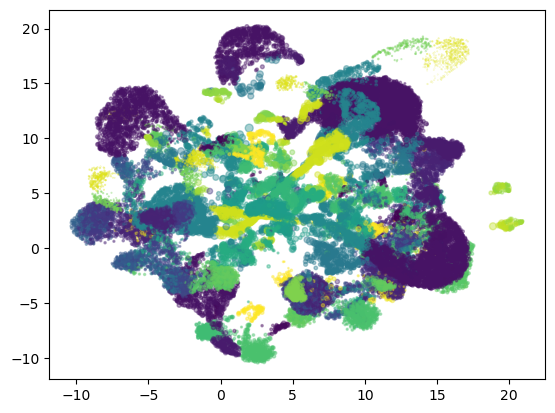

In [6]:
plt.scatter(train_gex.obsm["X_umap"][:,0], train_gex.obsm["X_umap"][:,1], c =train_gex.obs["cell_type"].cat.codes, s=train_gex.obs.size_factors*5, alpha=0.4)

In [7]:
train_adt.obsm

AxisArrays with keys: X_pca, X_umap, isotype_controls

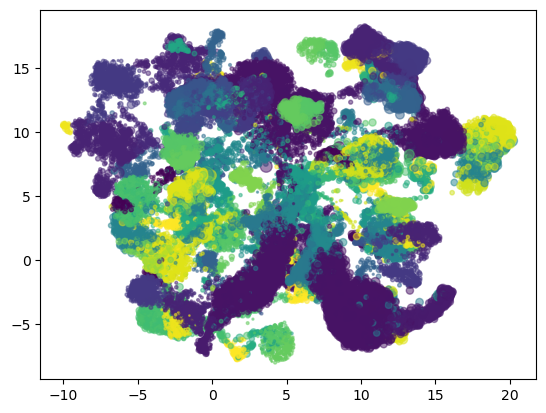

In [8]:

plt.scatter(train_adt.obsm["X_umap"][:,0], train_adt.obsm["X_umap"][:,1], c =train_adt.obs["cell_type"].cat.codes, alpha = 0.5, s = train_adt.obs["iso_count"])

### How many of these cells are in Mitosis?

Not sure if this matters at all. Im asuming the i

<Figure size 1500x1000 with 0 Axes>

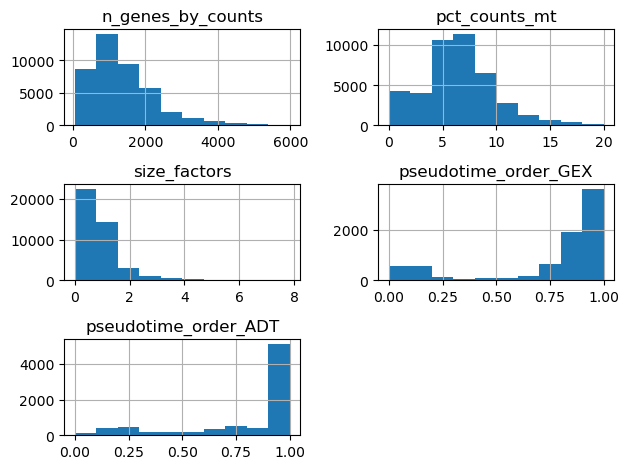

In [9]:
plt.figure(figsize = (15,10))
train_gex.obs.hist()
plt.tight_layout();

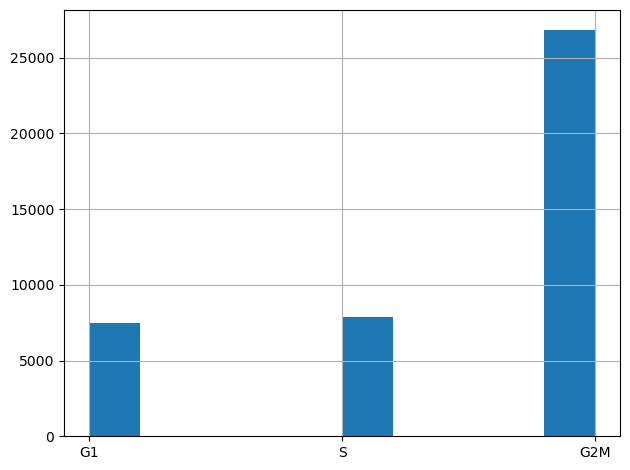

In [10]:
train_gex.obs.phase.hist()
plt.tight_layout();

In [11]:
train_adt.obsm



AxisArrays with keys: X_pca, X_umap, isotype_controls

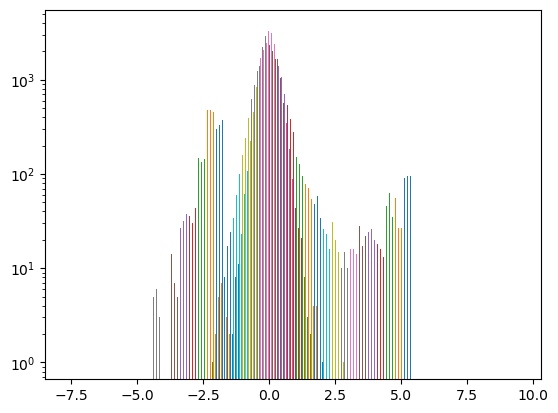

In [12]:
plt.hist(train_adt.obsm["X_pca"][:,:50], bins = 300)
plt.yscale('log');
#plt.xscale('log'); # WE may want to log scale our data

In [13]:
train_gex.X[:,:10]

<42123x10 sparse matrix of type '<class 'numpy.float64'>'
	with 20178 stored elements in Compressed Sparse Column format>

In [3]:
X_df = train_gex.to_df()

In [15]:
X_df.iloc[:,1].value_counts()

0.000000    40643
0.774971        1
0.944361        1
0.480397        1
1.015903        1
            ...  
0.597334        1
0.815233        1
0.970631        1
0.802132        1
0.473195        1
Name: LINC01409, Length: 1481, dtype: int64

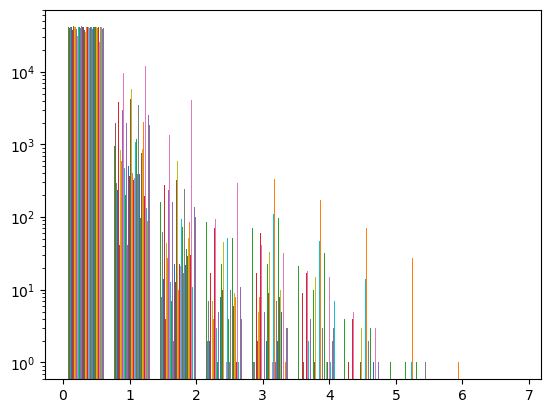

In [16]:
plt.hist(X_df.iloc[:,:100], bins = 10)
#plt.xscale('log')
plt.yscale('log')

## TODO
* Get rid of the batch effect
* Imputer 
* UMAP or AUTO ENCONDER
* Cluster the data 
* Create models based on that

## Imputing the data
* https://www.cell.com/cell/fulltext/S0092-8674(18)30724-4
* https://towardsdatascience.com/data-imputation-with-magic-85263d09a43f

In [9]:
foregut_data = pd.DataFrame(train_gex.X.toarray(), columns = train_gex.var_names)
foregut_data.head()

,AL627309.5,LINC01409,LINC01128,LINC00115,FAM41C,NOC2L,KLHL17,HES4,ISG15,AGRN,...,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB,AC011043.1,AL592183.1,AC240274.1,AC007325.4
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.568116,1.336257,4.044725,2.503000,0.000000,4.138442,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.388569,0.935002,3.362107,2.801673,0.573016,3.306986,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.666695,1.118634,3.640006,2.425099,1.118634,3.612585,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.784153,0.594040,3.263850,2.446407,0.594040,3.707536,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.153979,0.000000,4.909523,3.825554,0.000000,0.000000,0.0,0.0,0.0,0.0


In [4]:
magic_operator = magic.MAGIC()
X_magic = magic_operator.fit_transform(foregut_data)

Calculating MAGIC...
  Running MAGIC on 42123 cells and 13953 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 68.82 seconds.
    Calculating KNN search...
    Calculated KNN search in 145.23 seconds.
    Calculating affinities...
    Calculated affinities in 142.44 seconds.
  Calculated graph and diffusion operator in 358.47 seconds.
  Running MAGIC with `solver='exact'` on 13953-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 41.07 seconds.
Calculated MAGIC in 401.48 seconds.


In [14]:
X_magic.to_feather("../data/imputedTraining")

## UMAP dim reduction

In [3]:
X_magic_train = pd.read_feather("../data/imputedTraining.Feather")

In [4]:
reducer = umap.UMAP()
X_UMAP_train = reducer.fit_transform(X_magic_train)

In [25]:
labels = list(train_adt.obs["batch"].unique())

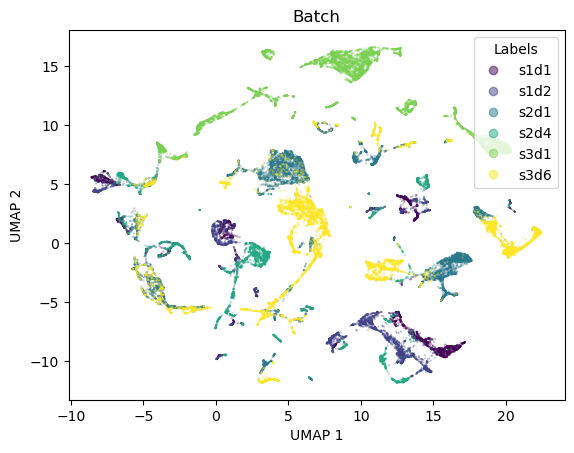

In [30]:
scatter = plt.scatter(X_UMAP_train[:,0], X_UMAP_train[:,1], c = train_adt.obs["batch"].cat.codes, alpha = 0.5, s = .1)
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.title("Batch")

# Add a legend
plt.legend(handles=scatter.legend_elements()[0], 
           loc="upper right", 
           title="Labels",
          labels = labels)

In [4]:
X_magic_train

,AL627309.5,LINC01409,LINC01128,LINC00115,FAM41C,NOC2L,KLHL17,HES4,ISG15,AGRN,...,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB,AC011043.1,AL592183.1,AC240274.1,AC007325.4
0,0.001740,0.009123,0.028933,0.026705,0.008326,0.079674,0.001473,0.000409,0.374847,0.000406,...,4.441584,1.382089,3.882066,2.359466,0.388844,4.171324,0.000542,0.129151,0.000937,0.028283
1,0.029378,0.056552,0.018354,0.006684,0.002468,0.136292,0.006744,0.001790,0.199067,0.007913,...,3.868381,1.842318,3.862584,2.881014,0.358441,3.666115,0.000159,0.011924,0.005805,0.003603
2,0.002098,0.019122,0.106236,0.016890,0.049416,0.210779,0.002273,0.008224,0.225520,0.006606,...,4.060036,1.307975,3.668563,2.305856,0.702078,3.797283,0.000105,0.051938,0.001388,0.000018
3,0.002732,0.048611,0.037495,0.021771,0.014751,0.113188,0.009234,0.007638,0.359163,0.000076,...,3.807726,1.079458,3.501916,2.427051,0.634261,3.811254,0.002104,0.039495,0.005681,0.003601
4,0.000154,0.002631,0.334720,0.002331,0.000145,0.031753,0.001818,0.000675,0.092958,0.000000,...,3.478953,0.943912,3.930203,2.661654,0.264987,3.627169,0.000000,0.028893,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42118,0.000166,0.008981,0.027856,0.007729,0.000270,0.054660,0.004713,0.000000,0.288844,0.000071,...,3.567202,0.943593,3.000429,2.035387,0.310290,3.490979,0.009045,0.002210,0.002324,0.000000
42119,0.000348,0.040391,0.063266,0.000006,0.010600,0.061602,0.022499,0.000025,0.102544,0.002228,...,3.615367,1.823038,3.456085,2.527004,0.286543,3.025696,0.004533,0.023596,0.011351,0.008367
42120,0.015161,0.015121,0.003145,0.003457,0.009606,0.068326,0.002755,0.001189,0.204000,0.001044,...,3.477892,1.384501,3.228573,2.090158,0.150683,3.021245,0.000016,0.008987,0.006796,0.002372
42121,0.002841,0.016410,0.074816,0.000113,0.005429,0.101707,0.000431,0.000000,0.046497,0.001736,...,3.162191,0.880286,2.896720,1.949199,0.649613,3.009955,0.009628,0.003526,0.000020,0.002550


## Single cell Integration

We need to normalisze the batches here. This is really bad no cappa


In [7]:
adata_X_magic_train = ad.AnnData(foregut_data)
adata_X_magic_train.obs = train_adt.obs

C:\Users\alexg\anaconda3\envs\gene-project\lib\site-packages\anndata\_core\anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [6]:
sc.tl.pca(adata_X_magic_train)


KeyboardInterrupt



In [8]:
sc.external.pp.bbknn(adata_X_magic_train, batch_key='batch')

ImportError: Please install bbknn: `pip install bbknn`.